# Exploratory Data Analysis of Istanbul Health Tourism Centers Data

## Import Required Packages

In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as col
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
import geoplot as gplt
from scipy.stats import iqr, skew, kurtosis, pearsonr
import contextily as ctx #Used in conjuction with matplotlib/geopandas to set a basemap

## Load Data

In [2]:
import_fp = Path("../data/processed/htourism_centers_processed.shp")
htourism_gdf = gpd.read_file(import_fp)

import_fp = Path("../data/external/district_income.xlsx")
extra_stats_df = pd.read_excel(import_fp, sheet_name = "main")

import_fp = Path("../data/external/istanbul_districts.shp")
istanbul_districts_gdf = gpd.read_file(import_fp)

## Summary Statistics

### Column Names

In [3]:
htourism_gdf.columns

Index(['institutio', 'latitude', 'longitude', 'district_e', 'district_t',
       'geometry'],
      dtype='object')

### Dataset Shape

In [4]:
htourism_gdf.shape

(155, 6)

### Health tourism center count per district

In [5]:
htourism_count_per_district = htourism_gdf.loc[:,"district_e"].value_counts().rename_axis('district_e').reset_index(name='counts')
htourism_count_per_district

,district_e,counts
0,Sisli,33
1,Besiktas,19
2,Kadikoy,17
3,Atasehir,15
4,Uskudar,13
5,Bakirkoy,8
6,Bahcelievler,7
7,Beyoglu,5
8,Beylikduzu,5
9,Eyupsultan,3


In [6]:
istanbul_districts_gdf = istanbul_districts_gdf.merge(htourism_count_per_district,
                                               on = "district_e",
                                               how = "left")

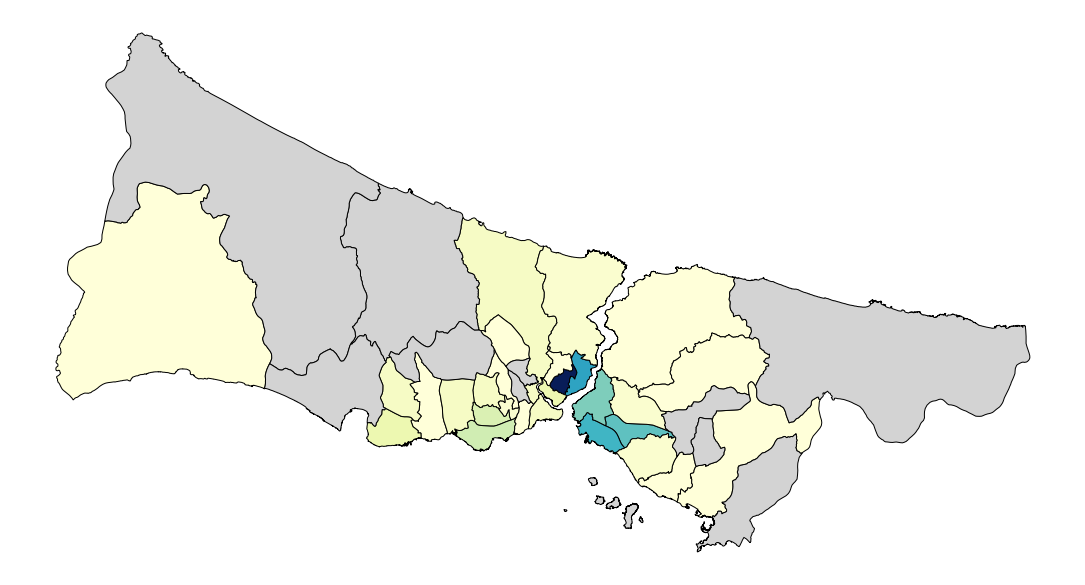

In [7]:
# --- Figure Preparation ---

fig = plt.figure(figsize = (19.20,19.20))

ax_1 = fig.add_subplot(1,1,1)

#                            --- MAP: ---

# --- Plot Figure ---

istanbul_districts_gdf.plot(ax = ax_1,
                    column = "counts",
                    edgecolor = "black",
                    missing_kwds={'color': 'lightgrey'},
                    alpha = 1,
                    cmap = cm.YlGnBu)

# --- Spine and Grid ---

ax_1.set_axis_off() # Turn off axis

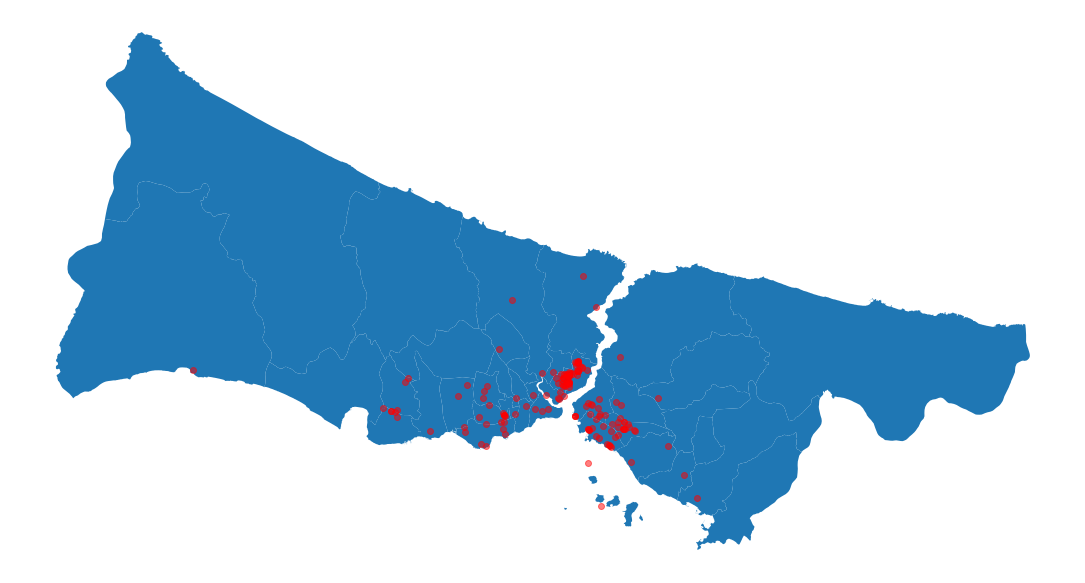

In [8]:
# --- Figure Preparation ---

fig = plt.figure(figsize = (19.20,19.20))

ax_1 = fig.add_subplot(1,1,1)

#                            --- MAP: ---

# --- Plot Figure ---

istanbul_districts_gdf.plot(ax = ax_1)

htourism_gdf.plot(ax = ax_1,
               color = "red",
               alpha = 0.5)

# --- Set Basemap ---


# --- Spine and Grid ---

ax_1.set_axis_off() # Turn off axis

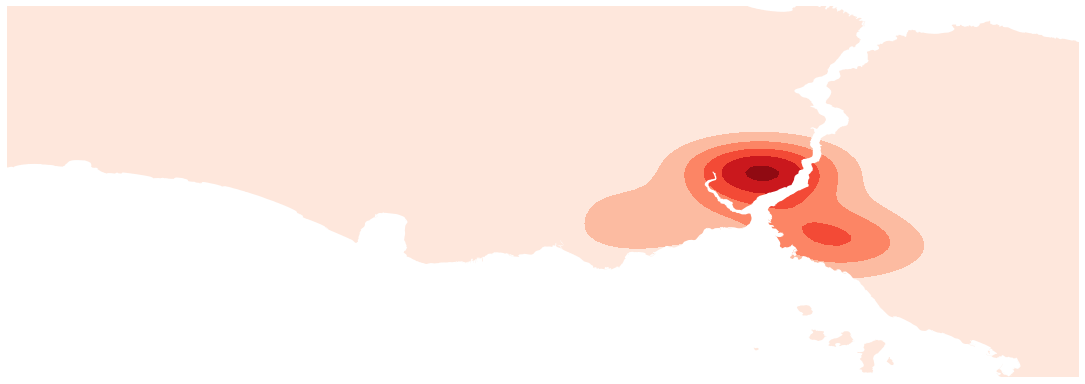

In [12]:
fig = plt.figure(figsize = (19.20,19.20))

ax_1 = fig.add_subplot(1,1,1)

istanbul_districts_gdf.plot(ax = ax_1)

gplt.kdeplot(htourism_gdf.geometry, ax = ax_1, cmap='Reds', shade = True,
             shade_lowest = True, n_levels = 5,
             clip = istanbul_districts_gdf)

ax_1.set_axis_off()

In [14]:
extra_stats_df.rename(columns = {"district_eng" : "district_e"}, inplace = True)
extra_stats_df.head(5)
istanbul_districts_gdf = istanbul_districts_gdf.merge(extra_stats_df.loc[:,["district_e", "population", "yearly_average_household_income"]],
                                               on = "district_e",
                                               how = "left")

In [15]:
dependent_variable = istanbul_districts_gdf.loc[:,"counts"]
independent_variables = [istanbul_districts_gdf.loc[:,"population"],
                         istanbul_districts_gdf.loc[:,"yearly_average_household_income"]]

In [18]:
istanbul_districts_gdf.fillna(value = 0, inplace = True)

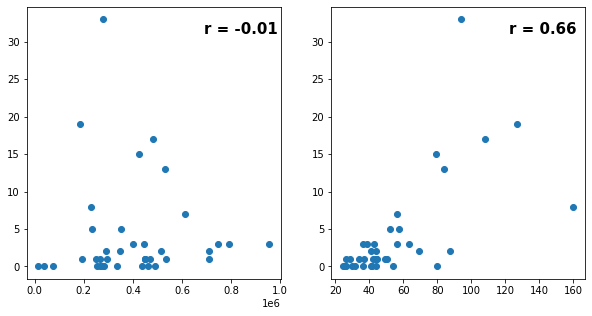

In [19]:
fig = plt.figure(figsize = (10, 5))

i = 0
for ind_variable in independent_variables:
    i += 1
    ax = fig.add_subplot(1,2,i)
    ax.scatter(x = ind_variable, y = dependent_variable)
    
    pearson_r = pearsonr(ind_variable, dependent_variable)[0]
    ax.annotate(s = "r = {:.2f}".format(pearson_r),
              xy = (.7, .9),
              xycoords=ax.transAxes,
              color = "black",
              weight = "bold",
              fontsize = 15)
    